# Machine failure classification using Gradient Boosting

## Total 3 model are made - Logistic regression , Random forest and Gradient boosting.

In [1]:
import pandas as pd

# Load the data
file_path = r"C:\Users\roari\Downloads\Machine Learning\failures.csv"
data = pd.read_csv(file_path)

# Original column names
original_columns = data.columns

# Simplified column names
simplified_columns = {
    'UDI': 'UDI',
    'Product ID': 'Product_ID',
    'Type': 'Type',
    'Air temperature [K]': 'Air_Temp_K',
    'Process temperature [K]': 'Process_Temp_K',
    'Rotational speed [rpm]': 'Rotational_Speed_rpm',
    'Torque [Nm]': 'Torque_Nm',
    'Tool wear [min]': 'Tool_Wear_min',
    'Target': 'Target',
    'Failure Type': 'Failure_Type'
}

# Rename the columns in the DataFrame
data.rename(columns=simplified_columns, inplace=True)

# Print the meanings of each column
meanings = {
    'UDI': 'Unique Device Identifier',
    'Product_ID': 'Identifier for the product',
    'Type': 'Type of the product',
    'Air_Temp_K': 'Air temperature in Kelvin',
    'Process_Temp_K': 'Process temperature in Kelvin',
    'Rotational_Speed_rpm': 'Speed of the rotating component in revolutions per minute',
    'Torque_Nm': 'Torque applied in Newton meters',
    'Tool_Wear_min': 'Minutes the tool has been in use',
    'Target': 'Target variable indicating the success criteria',
    'Failure_Type': 'Type of failure (if any) occurred'
}

# Output the new DataFrame and column meanings
print("Renamed Columns:")
print(data.head())  # Show the first few rows of the renamed DataFrame
print("\nMeanings of Each Column:")
for col, meaning in meanings.items():
    print(f"{col}: {meaning}")


Renamed Columns:
   UDI Product_ID Type  Air_Temp_K  Process_Temp_K  Rotational_Speed_rpm  \
0    1     M14860    M       298.1           308.6                  1551   
1    2     L47181    L       298.2           308.7                  1408   
2    3     L47182    L       298.1           308.5                  1498   
3    4     L47183    L       298.2           308.6                  1433   
4    5     L47184    L       298.2           308.7                  1408   

   Torque_Nm  Tool_Wear_min  Target Failure_Type  
0       42.8              0       0   No Failure  
1       46.3              3       0   No Failure  
2       49.4              5       0   No Failure  
3       39.5              7       0   No Failure  
4       40.0              9       0   No Failure  

Meanings of Each Column:
UDI: Unique Device Identifier
Product_ID: Identifier for the product
Type: Type of the product
Air_Temp_K: Air temperature in Kelvin
Process_Temp_K: Process temperature in Kelvin
Rotational_Spee

In [2]:
data.head()

,UDI,Product_ID,Type,Air_Temp_K,Process_Temp_K,Rotational_Speed_rpm,Torque_Nm,Tool_Wear_min,Target,Failure_Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
# Get the shape of the DataFrame
shape = data.shape
shape

(10000, 10)

In [4]:
# Get the column names
columns = data.columns.tolist()
columns

['UDI',
 'Product_ID',
 'Type',
 'Air_Temp_K',
 'Process_Temp_K',
 'Rotational_Speed_rpm',
 'Torque_Nm',
 'Tool_Wear_min',
 'Target',
 'Failure_Type']

In [5]:
# Get DataFrame info
info = data.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UDI                   10000 non-null  int64  
 1   Product_ID            10000 non-null  object 
 2   Type                  10000 non-null  object 
 3   Air_Temp_K            10000 non-null  float64
 4   Process_Temp_K        10000 non-null  float64
 5   Rotational_Speed_rpm  10000 non-null  int64  
 6   Torque_Nm             10000 non-null  float64
 7   Tool_Wear_min         10000 non-null  int64  
 8   Target                10000 non-null  int64  
 9   Failure_Type          10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
# Get descriptive statistics
description = data.describe()
description

,UDI,Air_Temp_K,Process_Temp_K,Rotational_Speed_rpm,Torque_Nm,Tool_Wear_min,Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [7]:
# Get data types of each column
data_types = data.dtypes
data_types

UDI                       int64
Product_ID               object
Type                     object
Air_Temp_K              float64
Process_Temp_K          float64
Rotational_Speed_rpm      int64
Torque_Nm               float64
Tool_Wear_min             int64
Target                    int64
Failure_Type             object
dtype: object

In [8]:
# Count of null values in each column
null_counts = data.isnull().sum()
null_counts

UDI                     0
Product_ID              0
Type                    0
Air_Temp_K              0
Process_Temp_K          0
Rotational_Speed_rpm    0
Torque_Nm               0
Tool_Wear_min           0
Target                  0
Failure_Type            0
dtype: int64

In [9]:
# Drop the specified columns
data_dropped = data.drop(columns=['UDI', 'Product_ID'])

print("*" * 125)

# Display the first few rows of the modified DataFrame
print("DataFrame after dropping 'UDI' and 'Product_ID':")
print(data_dropped.head())

print("*" * 125)

# Optionally, check the shape and remaining columns
print("\nNew Shape of DataFrame:", data_dropped.shape)
print("\nRemaining Columns:", data_dropped.columns.tolist())


*****************************************************************************************************************************
DataFrame after dropping 'UDI' and 'Product_ID':
  Type  Air_Temp_K  Process_Temp_K  Rotational_Speed_rpm  Torque_Nm  \
0    M       298.1           308.6                  1551       42.8   
1    L       298.2           308.7                  1408       46.3   
2    L       298.1           308.5                  1498       49.4   
3    L       298.2           308.6                  1433       39.5   
4    L       298.2           308.7                  1408       40.0   

   Tool_Wear_min  Target Failure_Type  
0              0       0   No Failure  
1              3       0   No Failure  
2              5       0   No Failure  
3              7       0   No Failure  
4              9       0   No Failure  
*****************************************************************************************************************************

New Shape of DataFrame: (10000,

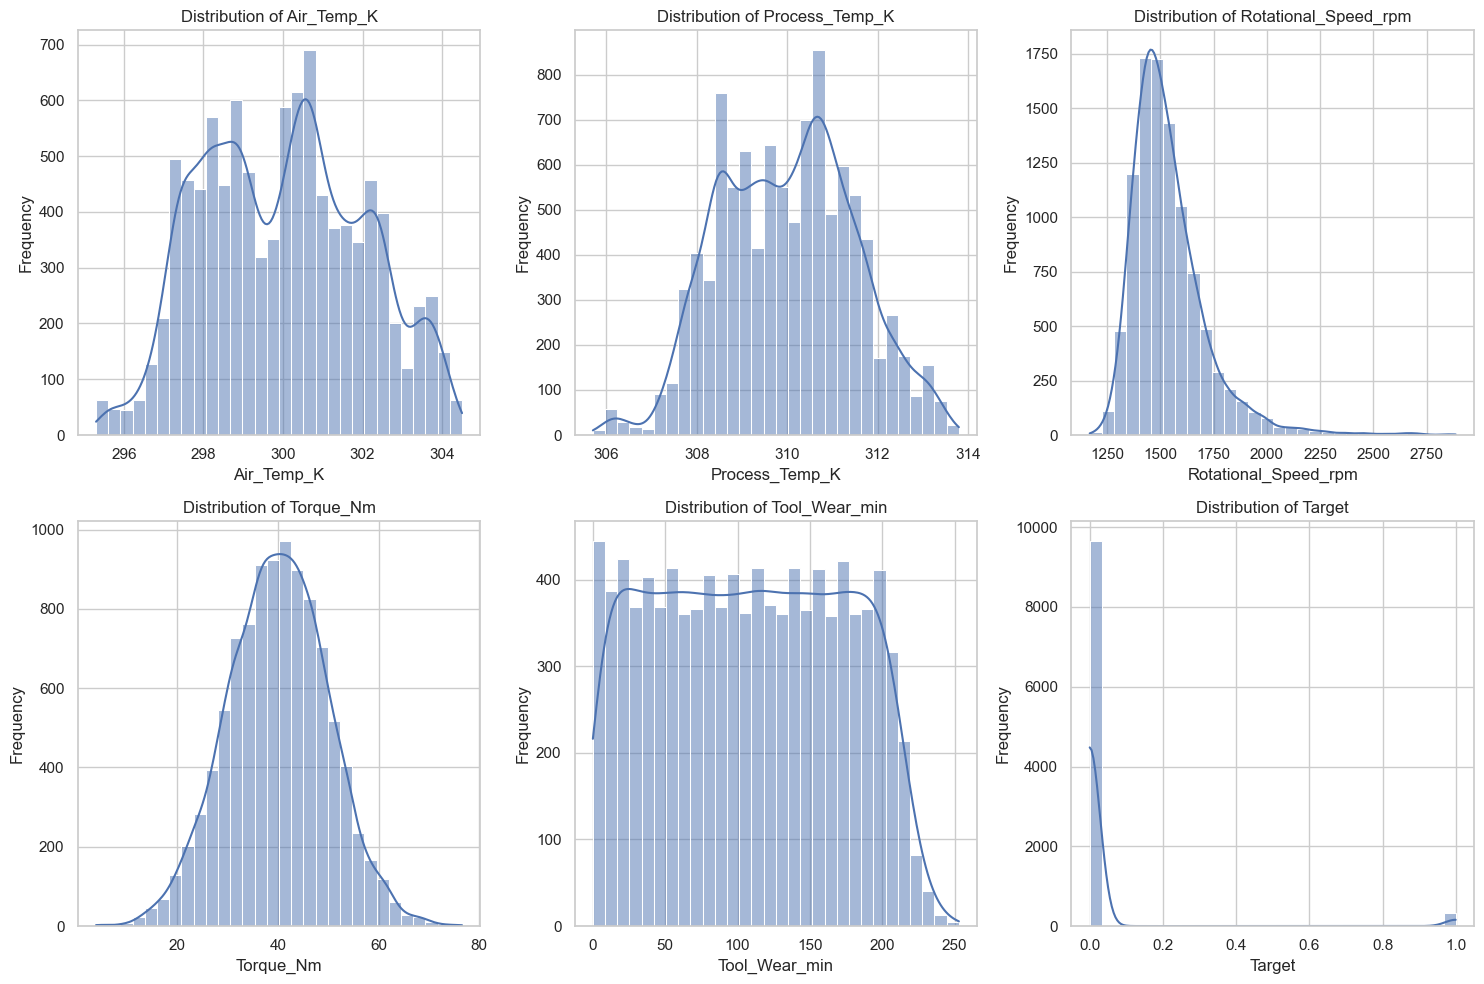

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# List of numeric columns to plot
numeric_columns = ['Air_Temp_K', 'Process_Temp_K', 'Rotational_Speed_rpm', 
                   'Torque_Nm', 'Tool_Wear_min', 'Target']

# Create a histogram for each numeric column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Create a subplot for each column
    sns.histplot(data_dropped[column], bins=30, kde=True)  # kde=True adds a density curve
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

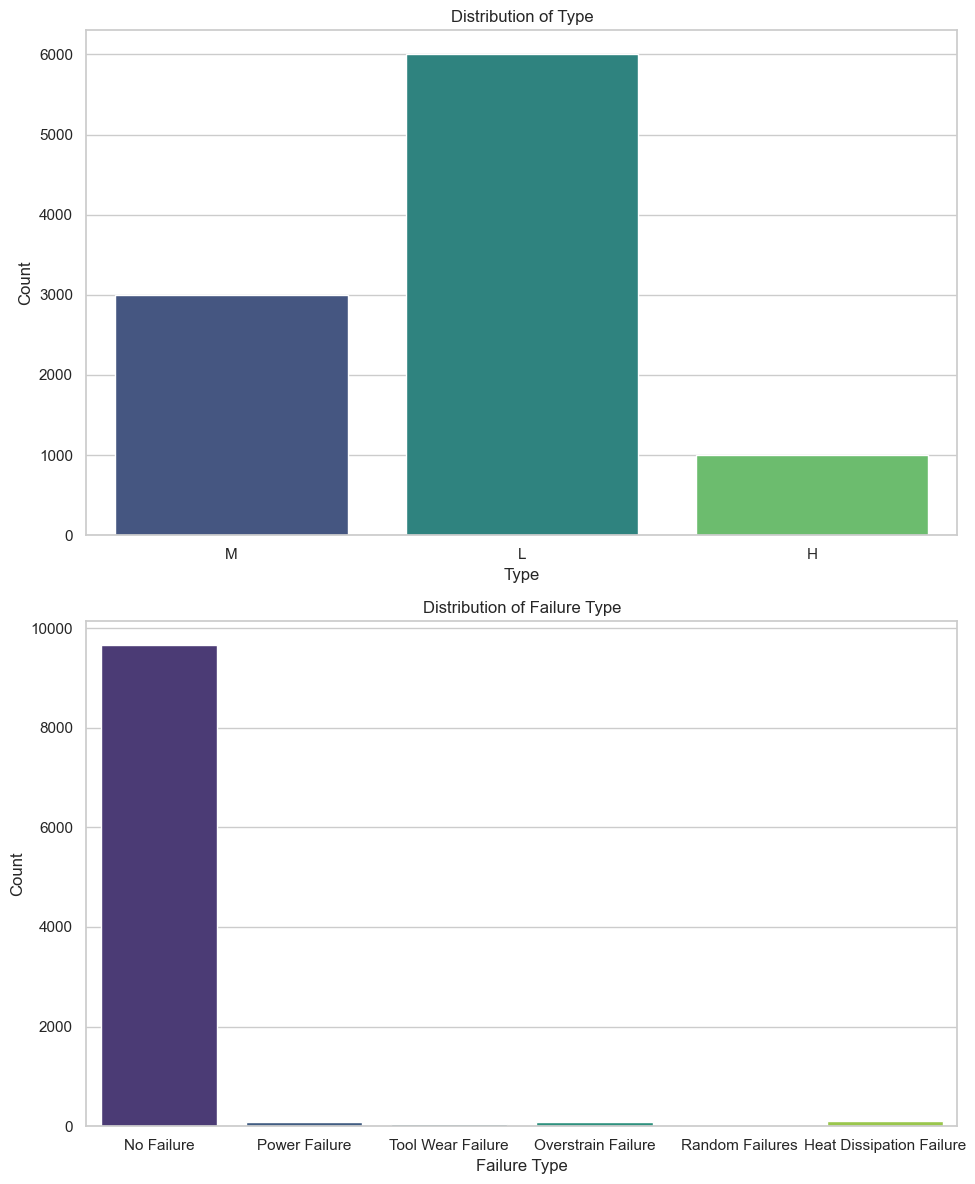

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with larger size
plt.figure(figsize=(10, 12))

# Distribution of Type
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
sns.countplot(data=data_dropped, x='Type', palette='viridis')
plt.title('Distribution of Type')
plt.xlabel('Type')
plt.ylabel('Count')

# Distribution of Failure Type
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
sns.countplot(data=data_dropped, x='Failure_Type', palette='viridis')
plt.title('Distribution of Failure Type')
plt.xlabel('Failure Type')
plt.ylabel('Count')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [12]:
# Identify duplicate rows
duplicates = data_dropped[data_dropped.duplicated(keep=False)]

# Display the duplicate rows
print("Duplicate Rows in the DataFrame:")
print(duplicates)

# Count of duplicate rows
num_duplicates = duplicates.shape[0]
print("\nNumber of Duplicate Rows:", num_duplicates)

Duplicate Rows in the DataFrame:
Empty DataFrame
Columns: [Type, Air_Temp_K, Process_Temp_K, Rotational_Speed_rpm, Torque_Nm, Tool_Wear_min, Target, Failure_Type]
Index: []

Number of Duplicate Rows: 0


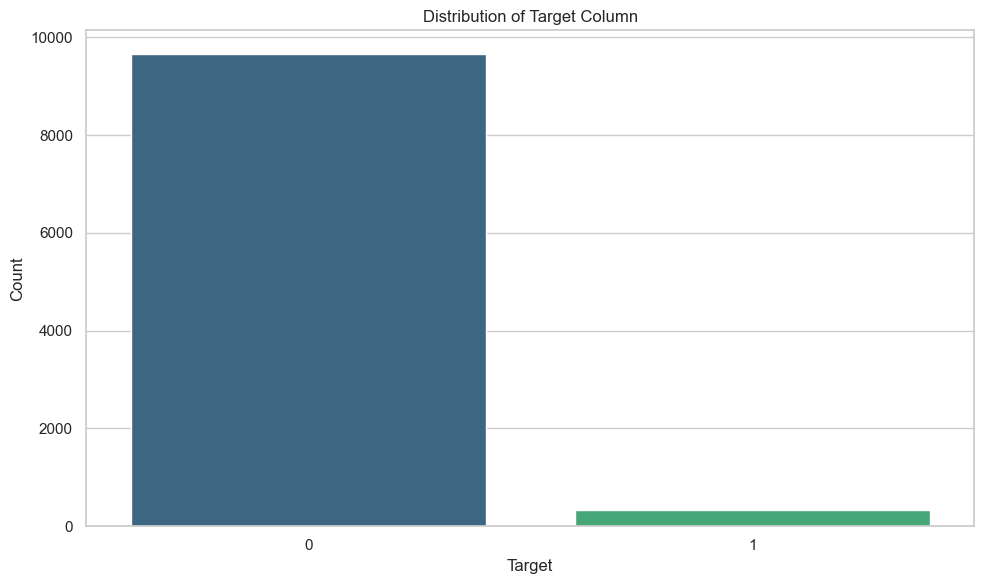

Distribution of Target Column:
   Target  Count
0       0   9661
1       1    339


In [13]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure for the histogram
plt.figure(figsize=(10, 6))

# Plot the distribution of the Target column
sns.countplot(data=data_dropped, x='Target', palette='viridis')
plt.title('Distribution of Target Column')
plt.xlabel('Target')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()

# Text format for distribution of Target column
target_distribution = data_dropped['Target'].value_counts().reset_index()
target_distribution.columns = ['Target', 'Count']

# Display the text format
print("Distribution of Target Column:")
print(target_distribution)


In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'data' is your DataFrame

# Separate features and target
X = data.drop('Target', axis=1)
y = data['Target']

# Define which columns are categorical and numerical
categorical_cols = ['Type', 'Failure_Type']
numerical_cols = ['Air_Temp_K', 'Process_Temp_K', 'Rotational_Speed_rpm', 'Torque_Nm', 'Tool_Wear_min']

# Create a preprocessor that will handle both scaling and one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standardize numerical columns
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical columns
    ])

# Apply transformations to the data
X_processed = preprocessor.fit_transform(X)

# Convert the result back to a DataFrame with feature names
X_processed_df = pd.DataFrame(X_processed, columns=preprocessor.get_feature_names_out())

# Check the head of the transformed data
print(X_processed_df.head())


   num__Air_Temp_K  num__Process_Temp_K  num__Rotational_Speed_rpm  \
0        -0.952389            -0.947360                   0.068185   
1        -0.902393            -0.879959                  -0.729472   
2        -0.952389            -1.014761                  -0.227450   
3        -0.902393            -0.947360                  -0.590021   
4        -0.902393            -0.879959                  -0.729472   

   num__Torque_Nm  num__Tool_Wear_min  cat__Type_H  cat__Type_L  cat__Type_M  \
0        0.282200           -1.695984          0.0          0.0          1.0   
1        0.633308           -1.648852          0.0          1.0          0.0   
2        0.944290           -1.617430          0.0          1.0          0.0   
3       -0.048845           -1.586009          0.0          1.0          0.0   
4        0.001313           -1.554588          0.0          1.0          0.0   

   cat__Failure_Type_Heat Dissipation Failure  cat__Failure_Type_No Failure  \
0                  

In [15]:
X_processed_df

,num__Air_Temp_K,num__Process_Temp_K,num__Rotational_Speed_rpm,num__Torque_Nm,num__Tool_Wear_min,cat__Type_H,cat__Type_L,cat__Type_M,cat__Failure_Type_Heat Dissipation Failure,cat__Failure_Type_No Failure,cat__Failure_Type_Overstrain Failure,cat__Failure_Type_Power Failure,cat__Failure_Type_Random Failures,cat__Failure_Type_Tool Wear Failure
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.602417,-1.082162,0.363820,-1.052012,-1.476034,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9996,-0.552421,-1.082162,0.520005,-0.821283,-1.428902,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9997,-0.502425,-0.947360,0.592519,-0.660777,-1.350349,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9998,-0.502425,-0.879959,-0.729472,0.854005,-1.303217,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [17]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from collections import Counter

# Assuming data_dropped is your DataFrame
X = data_dropped.drop(columns=['Target', 'Failure_Type'])
y = data_dropped['Target']

# Create a pipeline with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['Air_Temp_K', 'Process_Temp_K', 'Rotational_Speed_rpm', 'Torque_Nm', 'Tool_Wear_min']),
        ('cat', OneHotEncoder(), ['Type'])
    ]
)

# Transform features
X_encoded = preprocessor.fit_transform(X)

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Fit and resample
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Check the distribution after oversampling
print(f"Original distribution: {Counter(y)}")
print(f"Resampled distribution: {Counter(y_resampled)}")


Original distribution: Counter({0: 9661, 1: 339})
Resampled distribution: Counter({0: 9661, 1: 9661})


Logistic Regression Results:
Training Accuracy: 0.8294
Testing Accuracy: 0.8316
Classification Report:
 {'0': {'precision': 0.8308406395048994, 'recall': 0.8329886246122027, 'f1-score': 0.8319132455460883, 'support': 1934.0}, '1': {'precision': 0.832294911734164, 'recall': 0.8301398239254273, 'f1-score': 0.8312159709618875, 'support': 1931.0}, 'accuracy': 0.8315653298835705, 'macro avg': {'precision': 0.8315677756195317, 'recall': 0.831564224268815, 'f1-score': 0.8315646082539878, 'support': 3865.0}, 'weighted avg': {'precision': 0.8315672112189253, 'recall': 0.8315653298835705, 'f1-score': 0.8315648788650813, 'support': 3865.0}}
Confusion Matrix:
 [[1611  323]
 [ 328 1603]]
ROC AUC: 0.9124


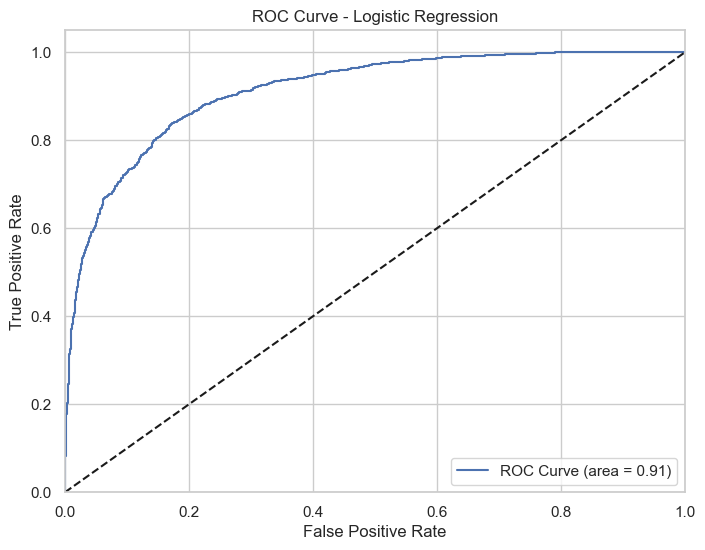

In [25]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Initialize and train the model
logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence warning
logistic_model.fit(X_train, y_train)

# Predictions
y_train_pred_logistic = logistic_model.predict(X_train)
y_test_pred_logistic = logistic_model.predict(X_test)

# Evaluate model
logistic_accuracy_train = accuracy_score(y_train, y_train_pred_logistic)
logistic_accuracy_test = accuracy_score(y_test, y_test_pred_logistic)
logistic_report = classification_report(y_test, y_test_pred_logistic, output_dict=True)
logistic_cm = confusion_matrix(y_test, y_test_pred_logistic)
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, y_prob_logistic)
logistic_roc_auc = roc_auc_score(y_test, y_prob_logistic)

# Display results
print("Logistic Regression Results:")
print(f"Training Accuracy: {logistic_accuracy_train:.4f}")
print(f"Testing Accuracy: {logistic_accuracy_test:.4f}")
print("Classification Report:\n", logistic_report)
print("Confusion Matrix:\n", logistic_cm)
print(f"ROC AUC: {logistic_roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(logistic_fpr, logistic_tpr, label=f'ROC Curve (area = {logistic_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()



Random Forest Results:
Training Accuracy: 1.0000
Testing Accuracy: 0.9837
Classification Report:
 {'0': {'precision': 0.9874934861907243, 'recall': 0.9798345398138573, 'f1-score': 0.983649104593823, 'support': 1934.0}, '1': {'precision': 0.9799588900308325, 'recall': 0.9875712066286898, 'f1-score': 0.9837503224142378, 'support': 1931.0}, 'accuracy': 0.983699870633894, 'macro avg': {'precision': 0.9837261881107784, 'recall': 0.9837028732212736, 'f1-score': 0.9836997135040304, 'support': 3865.0}, 'weighted avg': {'precision': 0.9837291122748767, 'recall': 0.983699870633894, 'f1-score': 0.9836996742215645, 'support': 3865.0}}
Confusion Matrix:
 [[1895   39]
 [  24 1907]]
ROC AUC: 0.9991


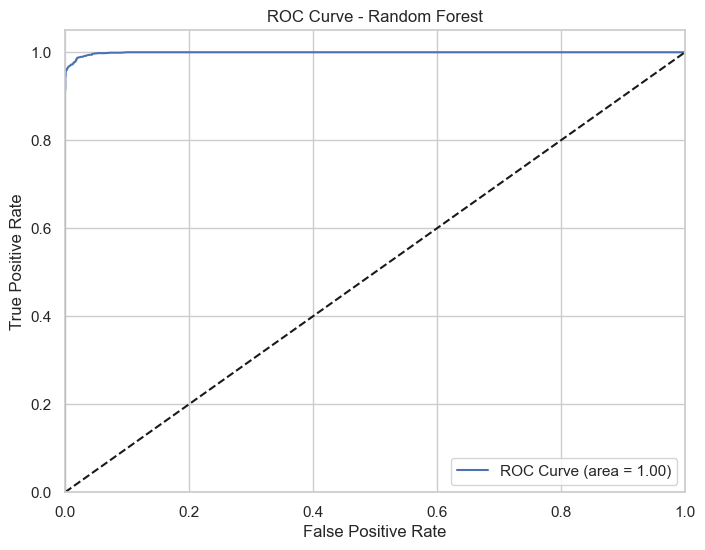

In [27]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate model
rf_accuracy_train = accuracy_score(y_train, y_train_pred_rf)
rf_accuracy_test = accuracy_score(y_test, y_test_pred_rf)
rf_report = classification_report(y_test, y_test_pred_rf, output_dict=True)
rf_cm = confusion_matrix(y_test, y_test_pred_rf)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_prob_rf)
rf_roc_auc = roc_auc_score(y_test, y_prob_rf)

# Display results
print("\nRandom Forest Results:")
print(f"Training Accuracy: {rf_accuracy_train:.4f}")
print(f"Testing Accuracy: {rf_accuracy_test:.4f}")
print("Classification Report:\n", rf_report)
print("Confusion Matrix:\n", rf_cm)
print(f"ROC AUC: {rf_roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'ROC Curve (area = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()



Gradient Boosting Results:
Training Accuracy: 0.9667
Testing Accuracy: 0.9625
Classification Report:
 {'0': {'precision': 0.9740328563857975, 'recall': 0.9503619441571872, 'f1-score': 0.9620518188955771, 'support': 1934.0}, '1': {'precision': 0.9514661274014156, 'recall': 0.9746245468669084, 'f1-score': 0.9629061140956766, 'support': 1931.0}, 'accuracy': 0.96248382923674, 'macro avg': {'precision': 0.9627494918936066, 'recall': 0.9624932455120478, 'f1-score': 0.9624789664956268, 'support': 3865.0}, 'weighted avg': {'precision': 0.9627582500031735, 'recall': 0.96248382923674, 'f1-score': 0.9624786349450966, 'support': 3865.0}}
Confusion Matrix:
 [[1838   96]
 [  49 1882]]
ROC AUC: 0.9931


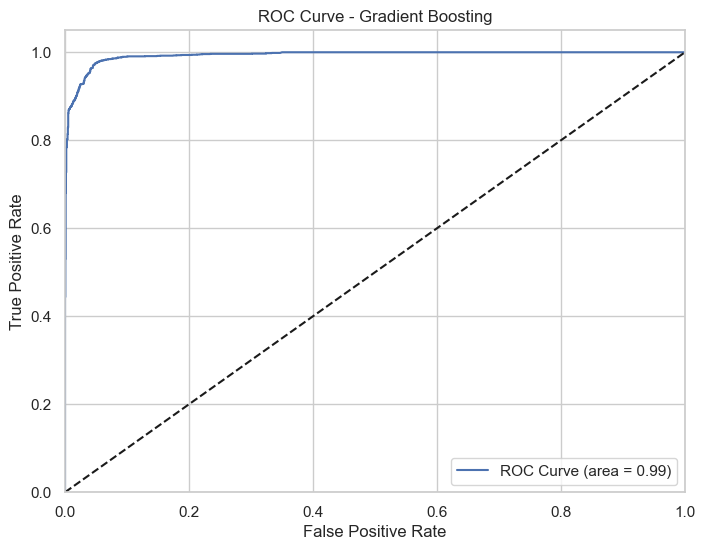

In [29]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Predictions
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

# Evaluate model
gb_accuracy_train = accuracy_score(y_train, y_train_pred_gb)
gb_accuracy_test = accuracy_score(y_test, y_test_pred_gb)
gb_report = classification_report(y_test, y_test_pred_gb, output_dict=True)
gb_cm = confusion_matrix(y_test, y_test_pred_gb)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]
gb_fpr, gb_tpr, _ = roc_curve(y_test, y_prob_gb)
gb_roc_auc = roc_auc_score(y_test, y_prob_gb)

# Display results
print("\nGradient Boosting Results:")
print(f"Training Accuracy: {gb_accuracy_train:.4f}")
print(f"Testing Accuracy: {gb_accuracy_test:.4f}")
print("Classification Report:\n", gb_report)
print("Confusion Matrix:\n", gb_cm)
print(f"ROC AUC: {gb_roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(gb_fpr, gb_tpr, label=f'ROC Curve (area = {gb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()
